In [154]:
dataset_name = "W21_comb"
df_list = 'BES_Panel'

# 'BES_Panel|BES_reduced'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

Toggle code

In [4]:
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_ages = pd.read_csv( BES_small_data_files + "pan_dataset_ages"+".csv" )
pan_dataset_votes = pd.read_pickle(BES_small_data_files + "pan_dataset_votes"+".zip", compression='zip')

pan_dataset_allr_values = pan_dataset_allr_values.set_index("id")

var_type (8079, 14)


In [49]:
pan_dataset_ages.index = pan_dataset_allr_values.index

In [172]:
search(BES_Panel,"^age$|^ageW\d\d?$")

ageW1     30582
ageW7     30895
ageW8     33502
ageW9     30036
ageW11    30956
ageW12    34394
ageW13    31135
ageW14    31063
ageW16    37959
ageW17    34366
ageW18    37825
ageW19    32177
ageW20    31468
ageW21    30281
ageW2     30258
ageW3     27825
ageW4     31546
ageW5     30709
ageW6     30150
ageW10    30236
ageW15    30831
Age       44269
dtype: int64

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            98442, 98443, 98444, 98445, 98446, 98447, 98448, 98449, 98450,
            98451],
           dtype='int64', name='id', length=97006)

In [174]:
temp = BES_Panel["ageW20"][BES_Panel["wave20"]==1.0].isnull()
len( set(temp[temp==True].index) - set(pan_dataset_ages.index) )

0

In [ ]:
## ageW20 and ageW21 can fill blanks (would be more consistent to run through whole process!)

In [ ]:
### working age/not working age, degree/not degree, VI

In [155]:
search(BES_Panel,"generalElectionVoteW|p_education_ageW").head(50)

generalElectionVoteW1     30539
generalElectionVoteW2     30249
generalElectionVoteW3     28296
generalElectionVoteW4     31547
generalElectionVoteW5     30508
generalElectionVoteW6     27838
generalElectionVoteW7     30895
generalElectionVoteW8     33502
generalElectionVoteW9     30036
generalElectionVoteW10    30237
generalElectionVoteW11    30956
generalElectionVoteW12    34394
generalElectionVoteW13    28296
generalElectionVoteW14    31063
generalElectionVoteW15    30572
generalElectionVoteW16    37959
generalElectionVoteW17    33992
generalElectionVoteW18    37372
generalElectionVoteW19    28901
generalElectionVoteW20    30956
generalElectionVoteW21    29753
p_education_ageW1         30372
p_education_ageW2         30459
p_education_ageW3         28114
p_education_ageW4         31289
p_education_ageW5         30782
p_education_ageW6         30114
p_education_ageW7         29933
p_education_ageW8         33144
p_education_ageW9         29777
p_education_ageW10        28740
p_educat

In [15]:
search(pan_dataset_ages,"Age_at_W\d\d?$")

Age_at_W1     97006
Age_at_W2     97006
Age_at_W3     97006
Age_at_W4     97006
Age_at_W5     97006
Age_at_W6     97006
Age_at_W7     97006
Age_at_W8     97006
Age_at_W9     97006
Age_at_W10    97006
Age_at_W11    97006
Age_at_W12    97006
Age_at_W13    97006
Age_at_W14    97006
Age_at_W15    97006
Age_at_W16    97006
Age_at_W17    97006
Age_at_W18    97006
Age_at_W19    97006
dtype: int64

In [25]:
BES_Panel[search(BES_Panel,"generalElectionVoteW").index].stack().value_counts()

Conservative                                171531
Labour                                      152867
Don't know                                   75487
Liberal Democrat                             50782
United Kingdom Independence Party (UKIP)     46847
Scottish National Party (SNP)                30146
I would/did not vote                         22252
Green Party                                  22184
Brexit Party                                 12121
Other                                         6703
Plaid Cymru                                   4591
British National Party (BNP)                   600
Change UK- The Independent Group               577
An independent candidate                       472
dtype: int64

In [26]:
BES_Panel[search(BES_Panel,"p_education_ageW").index].stack().value_counts()

20+                                  205061
16                                   136975
17-18                                127540
15 or under                           67379
19                                    28624
Still at school/Full time student     25151
Can't remember                         5057
dtype: int64

In [132]:
mask.groupby(age_plus_als_pair).sum()

18-64|19-    10262
18-64|20+     7662
65+|19-       7136
65+|20+       2606
dtype: int64

In [148]:
df_all = pd.concat(df_dict).reset_index()

In [152]:
df_all = df_all.rename(columns = {"level_0":"wave"})

In [153]:
df_all.to_pickle("VI_by_age_and_age_left_school.zip",compression='zip')

In [138]:
def get_age_category(x):
    if x>=65:
        return "65+"
    elif x>18:
        return "18-64"
    else:
        return "17-"
    
def get_wt_var(x):
    if x ==19:
        return "wt_new_W19_result"
    elif x==13:
        return "wt_new_W13_result"
    elif x>5:
        return "wt_new_W"+str(x)
    else:
        return "wt_full_W"+str(x)
    
age_left_school_dict = {"20+":"20+",
                        "19":"19-",
                        "16":"19-",
                        "17-18":"19-",
                        "15 or under":"19-",
                        "Still at school/Full time student":"AS",
                        "Can't remember":"DK"}
       
# 20+                                  205061
# 16                                   136975
# 17-18                                127540
# 15 or under                           67379
# 19                                    28624
# Still at school/Full time student     25151
# Can't remember                         5057                        

df_dict = {}
df = pd.DataFrame(columns = ["VI","age_and_when_left_school","%","Wave"])
for wave in list(range(1,20)):
    
    wt = BES_Panel[get_wt_var(wave)]
    age = pan_dataset_ages["Age_at_W"+str(wave)].apply(get_age_category).replace("17-",np.nan)
    age_left_school = BES_Panel["p_education_ageW"+str(wave)].replace(age_left_school_dict)\
                                                             .replace("AS",np.nan).replace("DK",np.nan)   
    age_plus_als_pair = age+"|"+age_left_school
    vi = BES_Panel["generalElectionVoteW"+str(wave)]
    mask = wt.notnull()&age_plus_als_pair.notnull()&vi.notnull()

    ## quick dirty full save of the dataframe before reducing to crosstabs
    df_short = pd.concat([vi,age,age_left_school,age_plus_als_pair,mask,wt],axis=1)
    df_short.columns = ["vi","age","age_left_school","age_and_when_left_school","mask","weight"]
    df_dict[wave] = df_short    
    
    
    ## making crosstabs
    
    temp = pd.crosstab(vi[mask],age_plus_als_pair[mask],values=wt[mask],aggfunc=sum,normalize='columns').reset_index().melt(id_vars = "generalElectionVoteW"+str(wave))
    temp.columns = ["VI","age_and_when_left_school","%"]
    temp["%"] = temp["%"]*100
    temp["Wave"] = wave
    df=df.append(temp)
    

In [142]:
# df_dict.to_pickle("VI_by_age_and_age_left_school.pkl")


# with open("VI_by_age_and_age_left_school.zip", 'wb') as handle:
#     pickle.dump(df_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

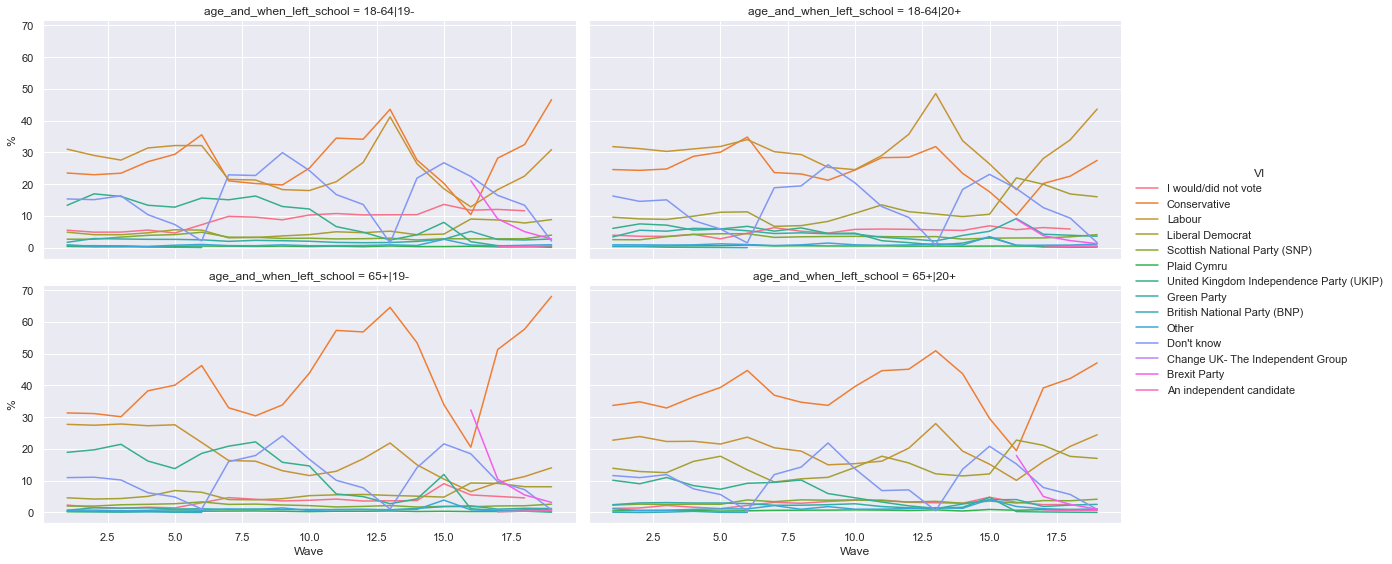

In [119]:
g = sns.FacetGrid(df, col="age_and_when_left_school", hue="VI", hue_kws={'markers': [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]}, 
                  col_wrap=2, height=4,aspect=2,)
g.map(sns.lineplot, "Wave","%")
g.add_legend()
plt.show()


Plaid Cymru                                 76
Don't know                                  76
Labour                                      76
Green Party                                 76
Scottish National Party (SNP)               76
Liberal Democrat                            76
Other                                       76
Conservative                                76
United Kingdom Independence Party (UKIP)    76
I would/did not vote                        64
British National Party (BNP)                24
Brexit Party                                16
An independent candidate                    12
Change UK- The Independent Group             4
Name: VI, dtype: int64

In [130]:
df

,VI,age_and_when_left_school,%,Wave
0,I would/did not vote,18-64|19-,5.506374,1
1,Conservative,18-64|19-,23.507750,1
2,Labour,18-64|19-,31.021987,1
3,Liberal Democrat,18-64|19-,4.890476,1
4,Scottish National Party (SNP),18-64|19-,2.680815,1
...,...,...,...,...
39,Green Party,65+|20+,2.556641,19
40,Other,65+|20+,1.161113,19
41,Brexit Party,65+|20+,1.028414,19
42,An independent candidate,65+|20+,0.671090,19


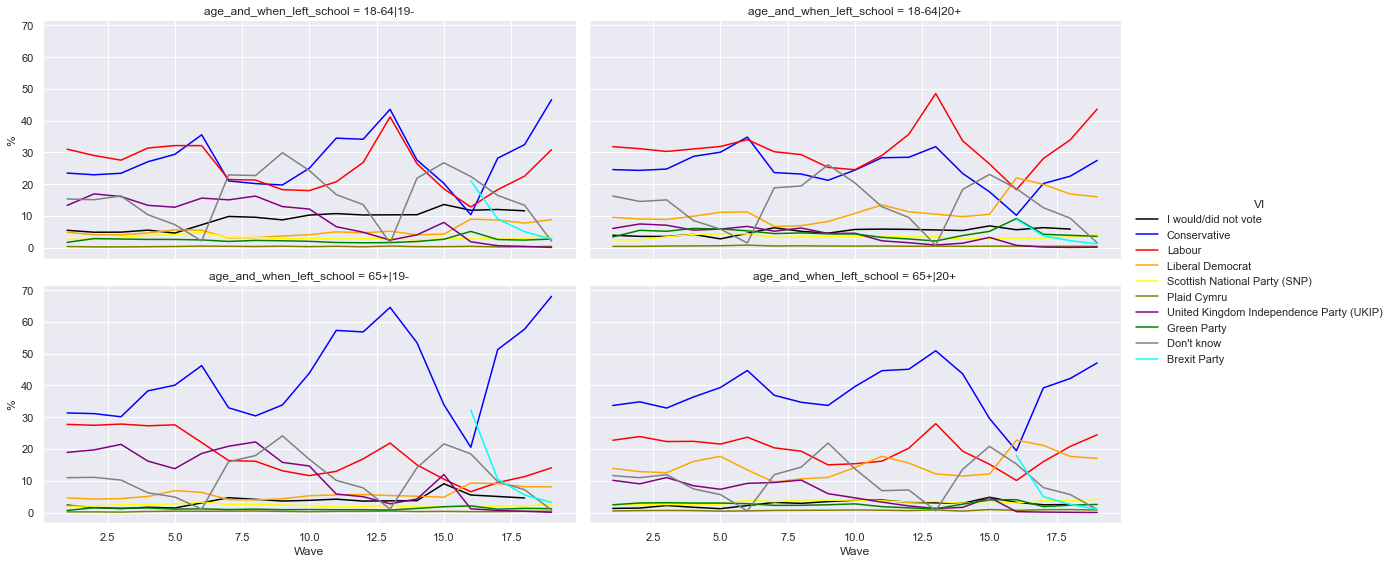

In [129]:
VI_replace_dict = {"Other":np.nan,"British National Party (BNP)":np.nan,
                   "An independent candidate":np.nan,"Change UK- The Independent Group":np.nan}

palette ={"Plaid Cymru": "olive", "Don't know": "grey", "I would/did not vote": "black",
          
          "Labour": "red","Green Party":"green","Scottish National Party (SNP)":"yellow","Liberal Democrat":"orange",
          "Conservative":"blue","United Kingdom Independence Party (UKIP)":"purple","Brexit Party":"cyan"}
g = sns.FacetGrid(df.replace(VI_replace_dict).dropna(), col="age_and_when_left_school", hue="VI",palette=palette,  
                  col_wrap=2, height=4,aspect=2,)
g.map(sns.lineplot, "Wave","%")
g.add_legend()
plt.show()


In [128]:
df.replace(VI_replace_dict).dropna()["VI"].value_counts()

palette ={"Plaid Cymru": "olive", "Don't know": "grey", "I would/did not vote": "black",
          
          "Labour": "red","Green Party":"green","Scottish National Party (SNP)":"yellow","Liberal Democrat":"orange",
          "Conservative":"blue","United Kingdom Independence Party (UKIP)":"purple","Brexit Party":"cyan"}

Plaid Cymru                                 76
Don't know                                  76
Labour                                      76
Green Party                                 76
Scottish National Party (SNP)               76
Liberal Democrat                            76
Conservative                                76
United Kingdom Independence Party (UKIP)    76
I would/did not vote                        64
Brexit Party                                16
Name: VI, dtype: int64

In [101]:
pd.crosstab(vi[mask],age_plus_als_pair[mask],values=wt[mask],aggfunc=sum,normalize='columns')

col_0,18-64|19-,18-64|20+,65+|19-,65+|20+
generalElectionVoteW19,,,,
Conservative,0.465948,0.274832,0.680257,0.470840
Labour,0.308767,0.436282,0.140701,0.244634
Liberal Democrat,0.088477,0.160336,0.080953,0.170342
Scottish National Party (SNP),0.039708,0.041176,0.026221,0.041722
Plaid Cymru,0.004488,0.004435,0.004291,0.008199
United Kingdom Independence Party (UKIP),0.001177,0.001968,0.000873,0.000265
Green Party,0.027519,0.036146,0.012497,0.025566
Other,0.009324,0.011489,0.008439,0.011611
Brexit Party,0.027260,0.012809,0.031807,0.010284


In [95]:
df["VI"].value_counts()

Plaid Cymru                                 76
Don't know                                  76
Labour                                      76
Green Party                                 76
Scottish National Party (SNP)               76
Liberal Democrat                            76
Other                                       76
Conservative                                76
United Kingdom Independence Party (UKIP)    76
I would/did not vote                        64
British National Party (BNP)                24
Brexit Party                                16
An independent candidate                    12
Change UK- The Independent Group             4
Name: VI, dtype: int64

In [33]:
pan_dataset_ages["Age_at_W1"].apply(get_age_category).value_counts()

18-64    77083
65+      13566
17-       6357
Name: Age_at_W1, dtype: int64

In [44]:
for wave in list(range(1,20)):
#     print(BES_Panel[get_wt_var(wave)])

id
1        0.619887
2        0.848408
3        4.428796
4        3.020551
5        0.562667
           ...   
98447         NaN
98448         NaN
98449         NaN
98450         NaN
98451         NaN
Name: wt_full_W1, Length: 97006, dtype: float64
id
1        0.611112
2             NaN
3        4.529572
4        2.879200
5        0.424303
           ...   
98447         NaN
98448         NaN
98449         NaN
98450         NaN
98451         NaN
Name: wt_full_W2, Length: 97006, dtype: float64
id
1             NaN
2        0.690841
3        4.887216
4             NaN
5             NaN
           ...   
98447         NaN
98448         NaN
98449         NaN
98450         NaN
98451         NaN
Name: wt_full_W3, Length: 97006, dtype: float64
id
1        0.593430
2        0.992115
3        4.073000
4             NaN
5             NaN
           ...   
98447         NaN
98448         NaN
98449         NaN
98450         NaN
98451         NaN
Name: wt_full_W4, Length: 97006, dtype: float64
id
1

In [40]:
search(BES_Panel,"wt_(new|full)_W\d\d?$").sort_index()

wt_full_W1     30235
wt_full_W10    30237
wt_full_W11    30956
wt_full_W2     30211
wt_full_W3     27839
wt_full_W4     31328
wt_full_W5     30725
wt_new_W10     30237
wt_new_W11     30956
wt_new_W12     34394
wt_new_W14     31063
wt_new_W15     30842
wt_new_W16     37959
wt_new_W17     34366
wt_new_W18     37825
wt_new_W6      30073
wt_new_W7      30895
wt_new_W8      33502
wt_new_W9      30036
dtype: int64